In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
import pandas as pd
df= pd.read_csv("C:\\Users\\pc\\Downloads\\39. cardekho_dataset.csv")


    


In [8]:
import pandas as pd

df.tail()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


In [10]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [18]:
A = print(df.columns)


Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')


In [8]:
df.shape

(15411, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


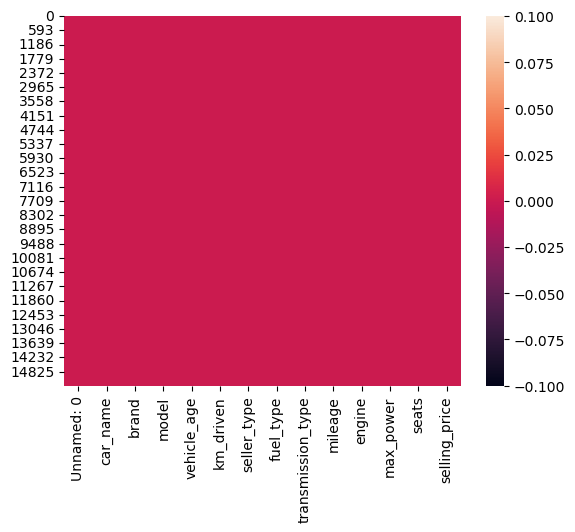

In [26]:
sns.heatmap(df.isnull())
plt.show()

#### As we can see, the entire plot is a single color and there are no white lines, which indicates that there are no missing values in the DataFrame.







In [27]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print()
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


# Feature Information

#### car_name: The full name of the car, including both the brand and the specific model.
#### brand: The brand name of the car.
#### model: The specific model name of the car from a particular brand.
#### seller_type: The type of seller offering the used car for sale.
#### fuel_type: The type of fuel the used car runs on.
#### transmission_type: The type of transmission used in the car being sold.
#### vehicle_age: The number of years since the car was purchased.
#### mileage: The distance the car can travel per litre of fuel, measured in kilometers.
#### engine: The engine capacity of the car, measured in cubic centimeters (cc).
#### max_power: The maximum power output of the car, measured in brake horsepower (BHP).
#### seats: The total number of seats in the car.
#### selling_price: The price at which the car is listed for sale on the website.

In [30]:
categorical_features

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

#### The categorical features in this dataset are: brand, model, seller_type, fuel_type, and transmission_type.

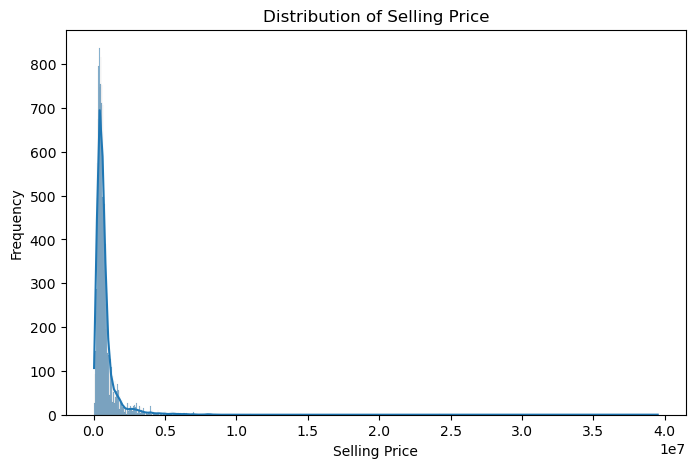

In [32]:
 # Distribution of Selling Price
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

#### The distribution of car selling prices appears to be right-skewed, indicating that there are a few cars with very high selling prices compared to the majority."

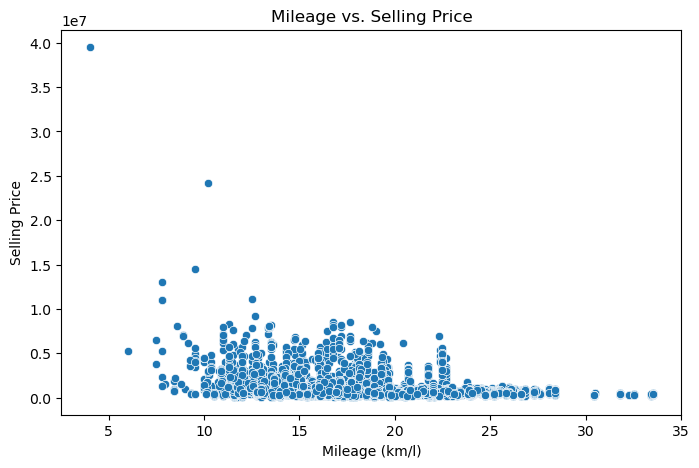

In [34]:
# Mileage vs. Selling Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='mileage', y='selling_price', data=df)
plt.title('Mileage vs. Selling Price')
plt.xlabel('Mileage (km/l)')
plt.ylabel('Selling Price')
plt.show()

#### The dataset reveals distinct clusters of cars with mileage ranging between 10-20 kilometers per liter. However, there are outliers observed in the data, where vehicles with relatively low mileage are sold at exceptionally high prices. These outliers likely signify luxury or high-end models, which command premium prices despite their lower mileage.

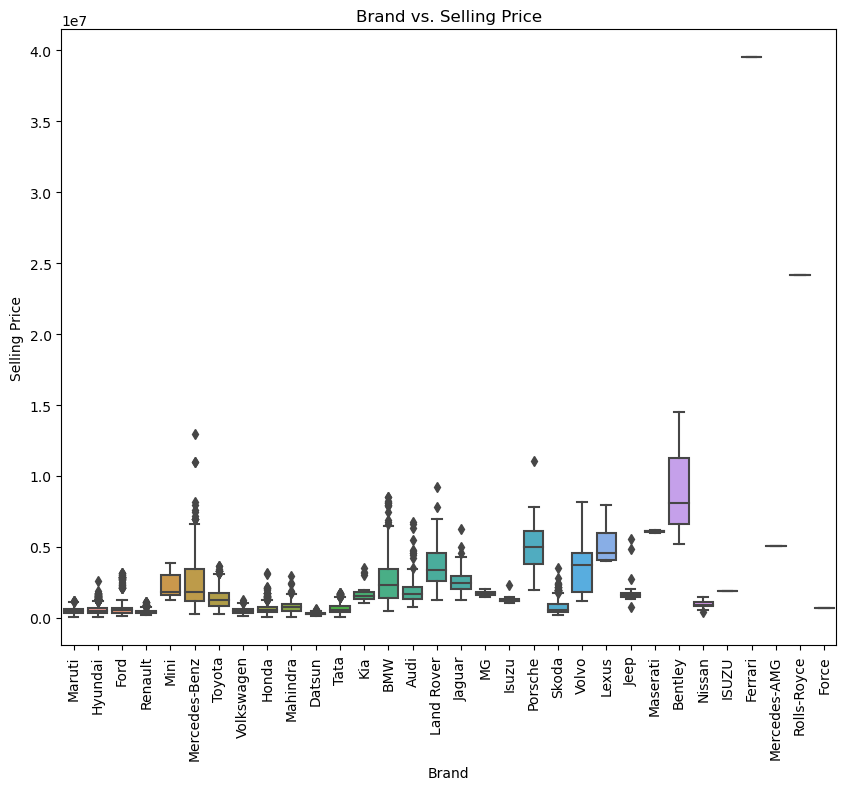

In [37]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='brand', y='selling_price', data=df)
plt.xticks(rotation=90)
plt.title('Brand vs. Selling Price')
plt.xlabel('Brand')
plt.ylabel('Selling Price')
plt.show()

#### The box plot shows that brands like mercedes-benz,BMW, Audi,Land rover,jaguar,porsche,volvo and bentley have higher median selling prices compared to brands like Maruti, Hyundai, and Tata.

##### Luxury brands such as BMW, Audi, and Mercedes-Benz have higher median selling prices and greater price dispersion, indicating a wide range of models and features. These brands also have several high-priced outliers, likely representing premium or special edition models. In contrast, economy brands like Maruti, Hyundai exhibit lower and more consistent prices, reflecting their focus on affordability and value. 

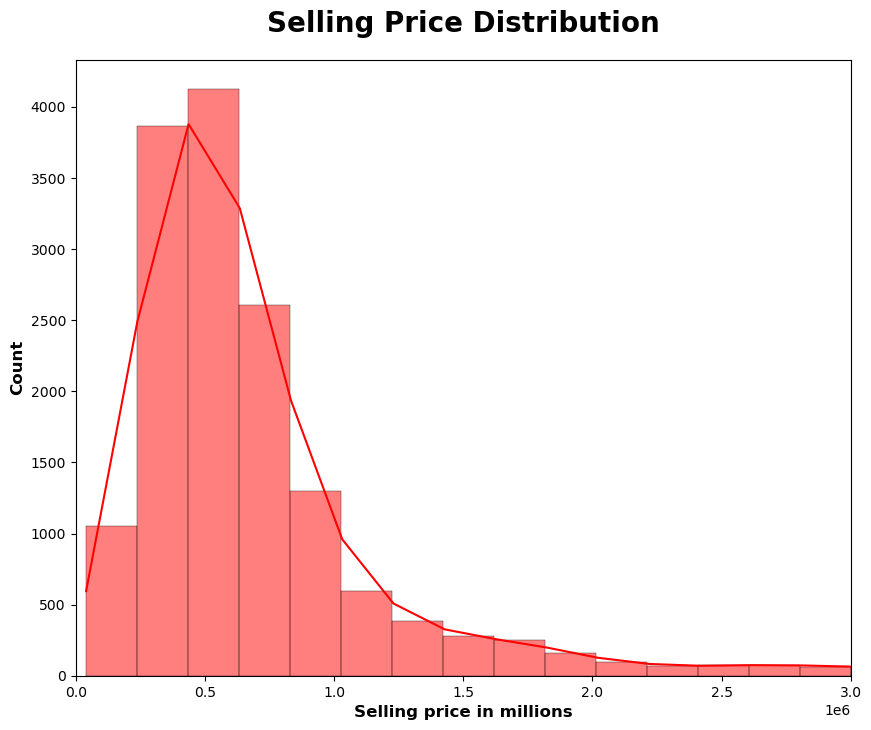

In [42]:
plt.subplots(figsize=(10,8))
sns.histplot(df.selling_price, bins=200, kde=True, color = 'r')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

#### The chart clearly indicates that the target variable is skewed.







In [47]:
brand = df.groupby('brand').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


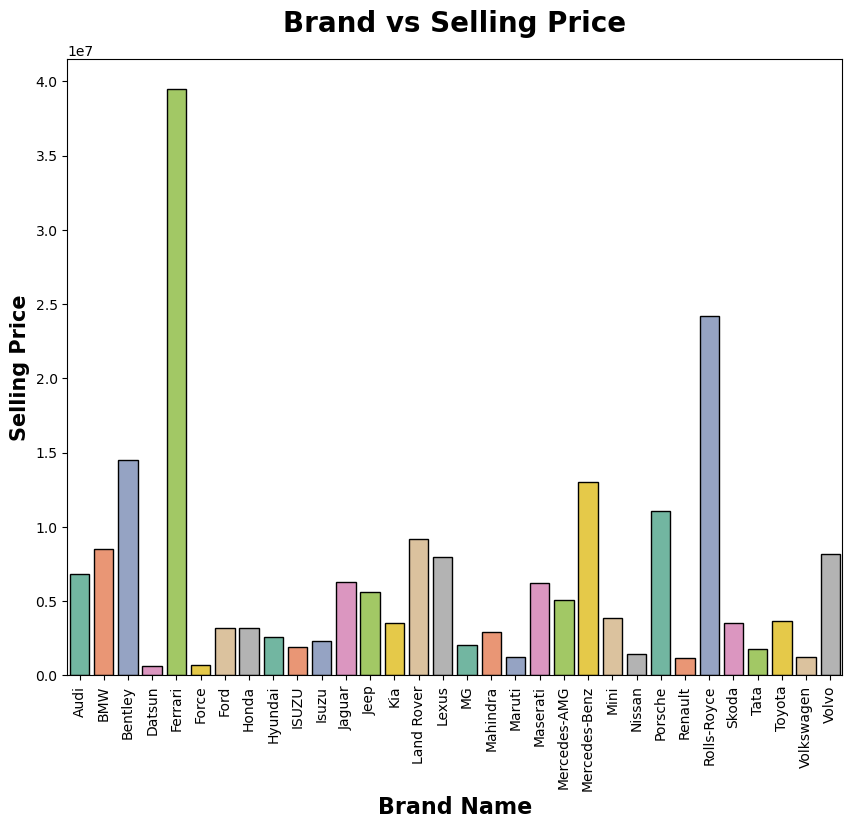

In [48]:
plt.subplots(figsize=(10,8))
sns.barplot(x=brand.index, y=brand.values,ec = "black",palette="Set2")
plt.title("Brand vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### Costliest Brand sold is Ferrari at 3.95 Crores.
#### Second most costliest car Brand is Rolls-Royce as 2.42 Crores.
#### Brand name has very clear impact on selling price.

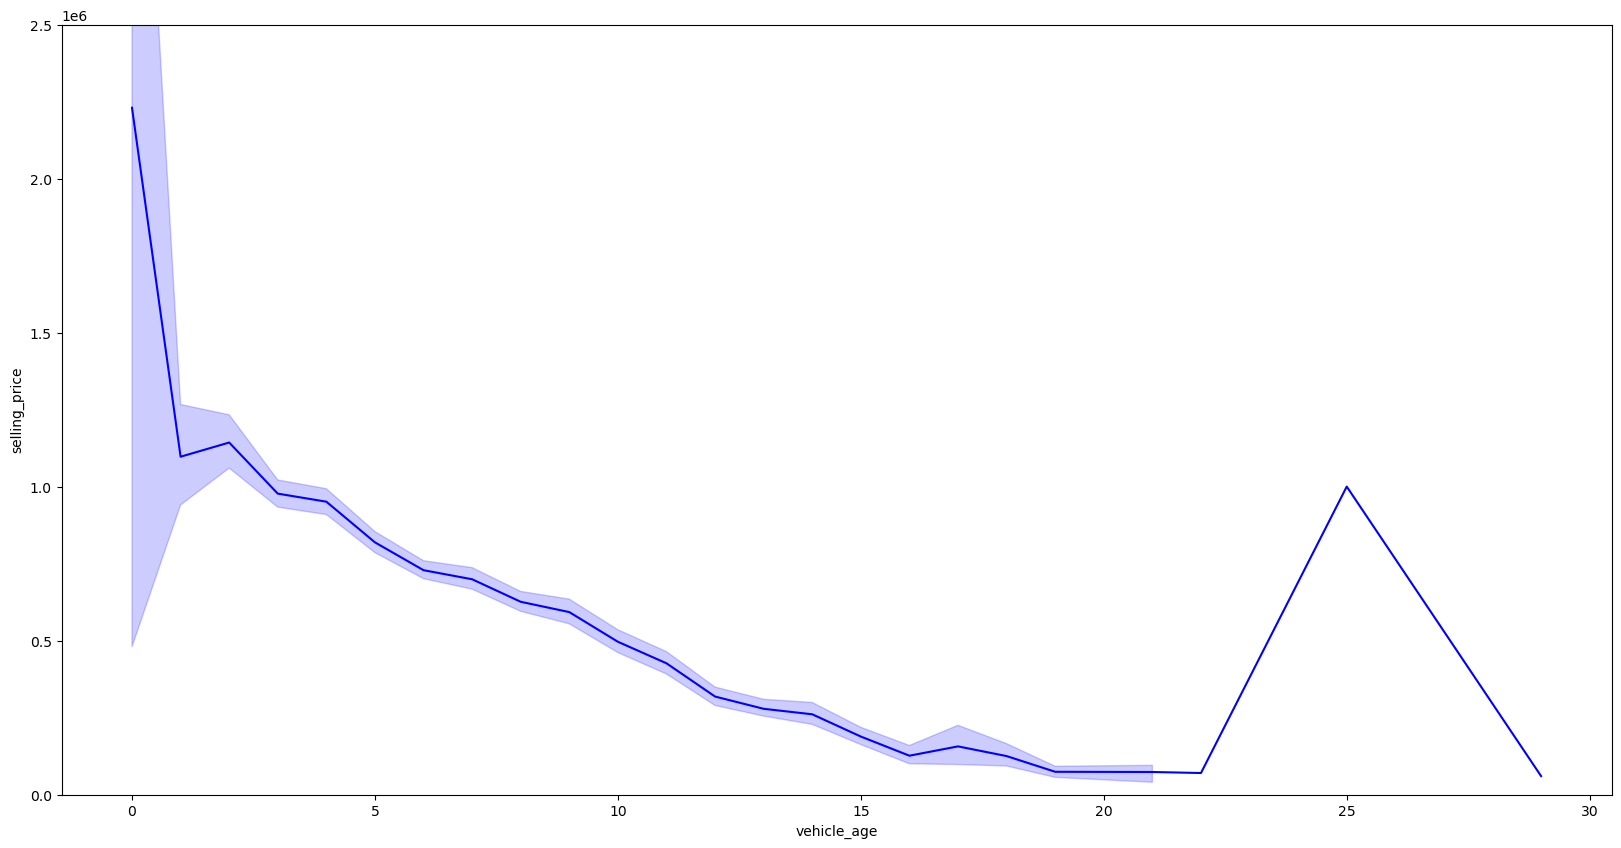

In [52]:
#vehical age vs selling price
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

#### As the vehicle age increases, there is a noticeable decrease in the selling price. This relationship indicates a negative impact of vehicle age on selling price.







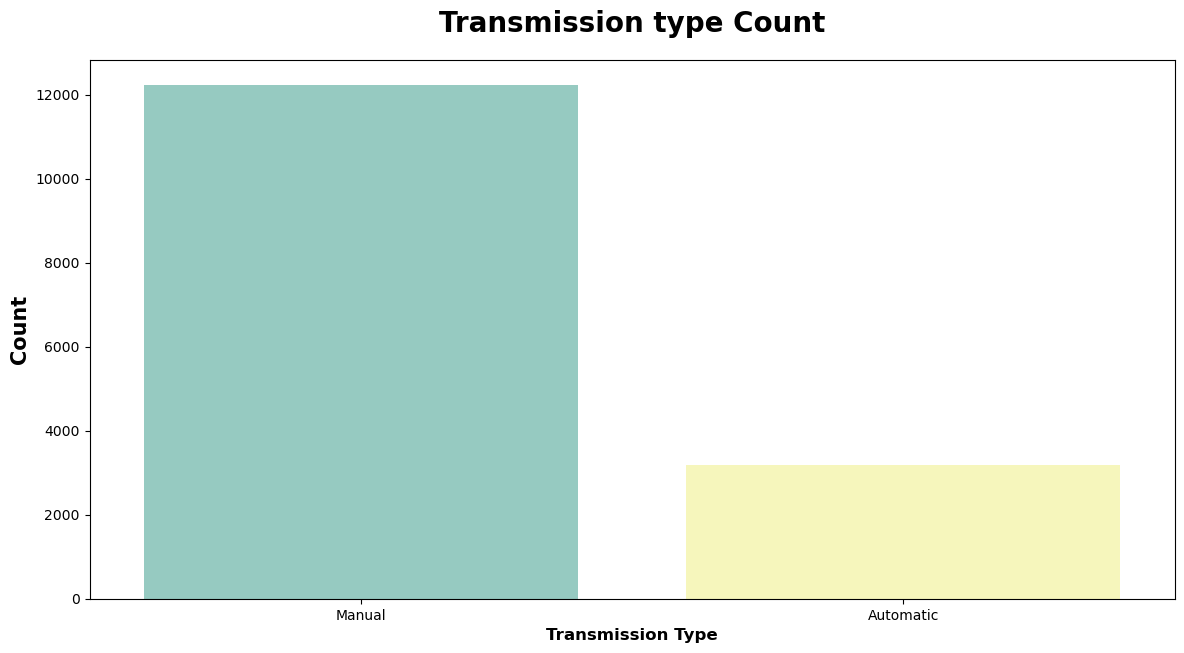

In [55]:
#transmission type
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data=df,palette="Set3")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

#### The chart indicates that there are a significant number of cars with manual transmission in the dataset.

 #### Conversely, cars with automatic transmission are also present, but the count is comparatively lower than that of manual transmission cars.

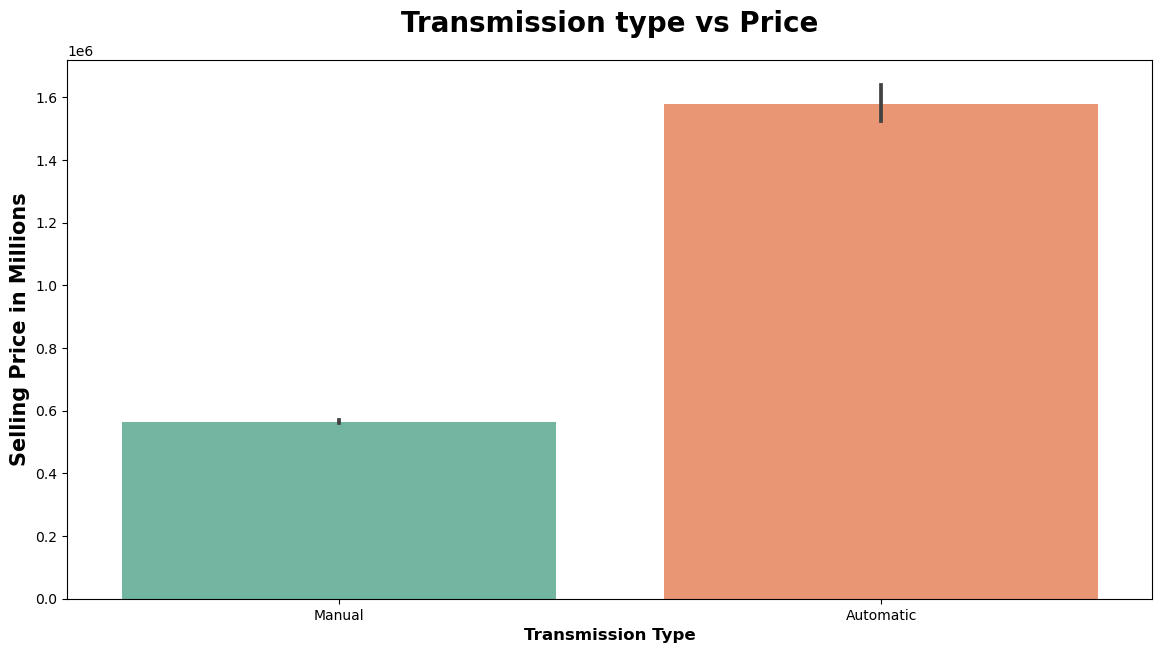

In [58]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data=df,palette="Set2")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

#### Manual Transmission was found in most of the cars which was sold.Automatic cars have more selling price than manual cars.

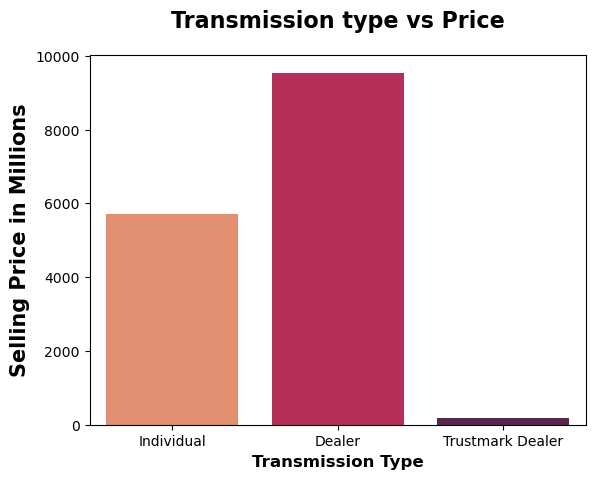

In [61]:
# plt.subplots(figsize=(10,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("Transmission type vs Price", weight="bold",fontsize=16, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

In [62]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


##### Dealers have put more ads on used car website.
##### Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
##### Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
##### Dealers have more median selling price than Individual.

# Final Report
##### The data consists of 13 columns and 15,411 rows.
##### The selling_price column is the target variable for prediction, indicating a regression problem.
###### Outliers are present in the following columns:
###### km_driven,engine,selling_price
###### Dealers are the primary sellers of used cars.
##### Some columns exhibit skewness, which will be addressed after handling the outliers.
###### Vehicle age negatively impacts the selling price.
###### Manual cars are sold more frequently than automatic cars, but automatic cars have a higher average selling price compared to manual cars.